# EDSA Apple Price Challenge
#### Team TS5 Regression

## Challenge description

Imagine you are in the Fresh Produce Industry. How much stock do you have on hand? Not too little that you run out of stock when customers want to buy more. And not too much that food waste occurs. How do you set your prices? Yields from farms fluctuate by season. Should your prices then also fluctuate by season?

  Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being able to accurately determine how much stock to have on hand and what price to set the Golden Delicious Apples to.
  
  With this context, we are challenged to construct a regression algorithm, by EDSA, capable of accurately predicting how much a kilogram of Golden Delicious Apples will cost, given certain parameters.


## Outline

## Introduction

In this report, the aim is to construct a regression algorithm, capable of accurately predicting how much a kilogram of Golden Delicious Apples will cost, given certain parameters. 

  To achieve this, we will Goal perform a pre-modeling/modeling of work, exploratory data, and investigate the importance of data preprocessing, feature exploration, and feature engineering on model performace.
  
  Python libraries used:
* Numpy
* Pandas
* Sci-kit learn
* Matplotlib
* Almost entire workflow is covered by these four libraries

# Importing Libraries

We will be importing a few python libraries.

In [75]:





# Visualisations  ''''''''''''''''testing testing!!!!!!!!!!!!!!!!!!!!!!ppppdddd
#import missingno

import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline

# Other
from scipy import stats
import math
import pickle
import pandas as pd
import numpy as np

ModuleNotFoundError: No module named 'plotly'

We will be loading our data as a Pandas Dataframe. For this challenge we will be using `EDSA Apple Price Challenge` dataset.

In [54]:
train = pd.read_csv(r'https://raw.githubusercontent.com/CPNMorgan/sharing-github/main/df-train_set.csv')

In [15]:
train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


We look at the top rows of our data in order to see the features as well as the types of data we are working with.



# Data Cleaning

If we want to build some relationship between variables that are likely to indicate the average price per kg of Golden Delicious Apples, we really only want to consider the sales which involved Golden Delicious Apples to build this relationship:

In [55]:
train_data = train.copy()
train_data = train_data[train_data['Commodities']=='APPLE GOLDEN DELICIOUS']
train_data.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


In [56]:
train_data.shape

(1952, 13)

The shape command shows us we have 1952 rows and 13 columns.

Let's check if we have any unique values in our columns.

In [57]:
train_data.nunique()

Province               7
Container             11
Size_Grade            10
Weight_Kg              9
Commodities            1
Date                 147
Low_Price             94
High_Price            88
Sales_Total         1324
Total_Qty_Sold       505
Total_Kg_Sold        850
Stock_On_Hand        735
avg_price_per_kg     601
dtype: int64

We do not need columns with cardinality of 1. We can remove the column with an iterator.

In [58]:
train_data = train_data.drop('Commodities', axis=1) 

### Summary Statistics

Let's explore the data types and the summary statistics of our variables.

We'll start by looking at the data types and number of entries of each column.

In [59]:
# Checking basis information about column types and null values
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 12 columns):
Province            1952 non-null object
Container           1952 non-null object
Size_Grade          1952 non-null object
Weight_Kg           1952 non-null float64
Date                1952 non-null object
Low_Price           1952 non-null float64
High_Price          1952 non-null float64
Sales_Total         1952 non-null float64
Total_Qty_Sold      1952 non-null int64
Total_Kg_Sold       1952 non-null float64
Stock_On_Hand       1952 non-null int64
avg_price_per_kg    1952 non-null float64
dtypes: float64(6), int64(2), object(4)
memory usage: 198.2+ KB


The info command confirms our categorial and numerial features. We have 1952 samples in our dataset. Data is organized in 12 columns. From this, we can see that there are no null values in our data.

Now let's look at a table showcasing the summary statistics of the numeric data.

In [60]:
train_data.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


Now it's time to remove further missing data and outliers. We will use quantiles of 1% or/and 99% for outliers detection. We consider this method more appropriate than IQR score this time as IQR method would not work well for data concerning apple products. 25% and 75% quantiles differ only by one unit.

In [62]:
print(f'99% of observations in Low_Price are lower than {train_data["Low_Price"].quantile(0.99)}')

99% of observations in Low_Price are lower than 2000.0


In [63]:
# Removing outliers
train_data = train_data.query('Low_Price < 2000')

In [64]:
print(f'99% of observations in Sales_Total are higher than {train_data["Sales_Total"].quantile(0.01)} \
and lower than {train_data["Sales_Total"].quantile(0.99)}')

99% of observations in Sales_Total are higher than 20.0 and lower than 194376.8


In [65]:
# Removing outliers
train_data = train_data.query('(Sales_Total > 20.0) & (Sales_Total < 194376.8)')

In [66]:
print(f'99% of observations in Total_Kg_Sold are higher than {train_data["Total_Kg_Sold"].quantile(0.01)} \
and lower than {train_data["Total_Kg_Sold"].quantile(0.99)}')

99% of observations in Total_Kg_Sold are higher than 9.0 and lower than 19668.787999999993


In [68]:
# Removing outliers
train_data = train_data.query('(Total_Kg_Sold > 9.0) & (Total_Kg_Sold < 19668.787999999993)')

In [70]:
print(f'99% of observations in Stock_On_Hand are higher than {train_data["Stock_On_Hand"].quantile(0.01)} \
and lower than {train_data["Stock_On_Hand"].quantile(0.99)}')

99% of observations in Stock_On_Hand are higher than 0.0 and lower than 3535.1999999999994


In [71]:
# Removing outliers
train_data = train_data.query('(Stock_On_Hand > 0.0) & (Stock_On_Hand < 3535.1999999999994)')

In [72]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453 entries, 1 to 64310
Data columns (total 12 columns):
Province            1453 non-null object
Container           1453 non-null object
Size_Grade          1453 non-null object
Weight_Kg           1453 non-null float64
Date                1453 non-null object
Low_Price           1453 non-null float64
High_Price          1453 non-null float64
Sales_Total         1453 non-null float64
Total_Qty_Sold      1453 non-null int64
Total_Kg_Sold       1453 non-null float64
Stock_On_Hand       1453 non-null int64
avg_price_per_kg    1453 non-null float64
dtypes: float64(6), int64(2), object(4)
memory usage: 147.6+ KB


Our dataset has been signifincatly reduced, however it was necessary for purpose of the data cleaning. 

In [73]:
train_data.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,26.893187,131.516173,165.011012,16375.093599,157.451480,2265.323469,450.147970,7.156930
std,71.294077,241.321424,298.088254,25520.151918,231.130358,3332.848610,593.672381,2.089546
min,3.000000,2.000000,10.000000,30.000000,1.000000,11.000000,1.000000,1.110000
25%,9.000000,55.000000,65.000000,1362.000000,14.000000,204.000000,70.000000,5.710000
50%,12.000000,84.000000,112.000000,5680.000000,64.000000,852.000000,222.000000,7.050000
75%,18.300000,120.000000,160.000000,20440.000000,202.000000,2940.000000,569.000000,8.610000
max,400.000000,1900.000000,2200.000000,183066.000000,1616.000000,19600.000000,3482.000000,21.240000


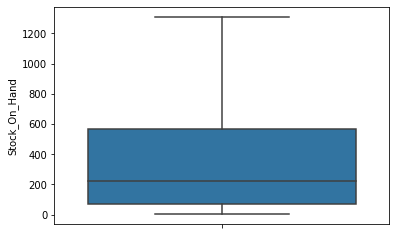

In [77]:
_ = sns.boxplot(data=train_data, y='Stock_On_Hand', showfliers=False)

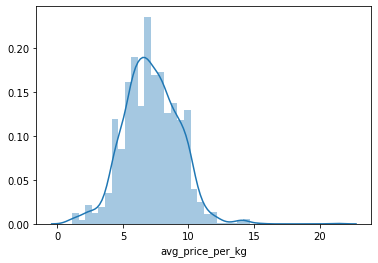

In [80]:
_ = sns.distplot(train_data['avg_price_per_kg'], kde=True)

Now, let's take a look at the categorical data.

In [81]:
train_data.describe(include='object')

,Province,Container,Size_Grade,Date
count,1453,1453,1453,1453
unique,7,9,10,147
top,CAPE,M4183,1S,2020-04-22
freq,867,510,354,17


Cape is the province where most properties were sold. We have 9 different container categories, however almost a third of the containers belong to 'M4183' category. By far the most common size grade was 1S.

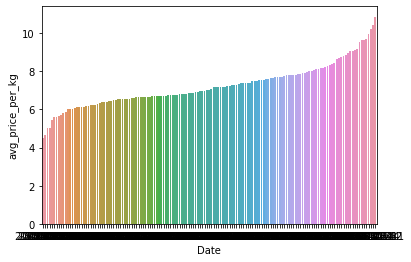

In [83]:
_ = sns.barplot(data=train_data.groupby('Date').agg({'avg_price_per_kg':'median'}).sort_values(by='avg_price_per_kg').reset_index(),\
                x='Date', y='avg_price_per_kg')


Apples in the country are becoming more expensive.

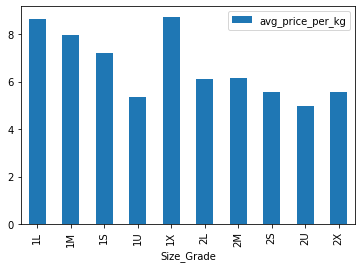

In [84]:
_ = train_data.groupby('Size_Grade').agg({'avg_price_per_kg':'median'}).sort_values(by='Size_Grade').plot(kind='bar')

## Dummy Variable Encoding

All input data for regression model building purposes needs to be numerical. We therefore have to transform the text data (found within columns such as 'Province','Container', 'Size_Grade', 'Commodities' and 'Date') into numbers before we can train our machine learning model.

To facilitate this transformation from textual-categorical data to numerical equivalents, we use a pandas method called get_dummies. The text data are categorical variables, and ***get_dummies*** will transform all the categorical text data into numbers by adding a column for each distinct category. The new column has a 1 for observations which were in this category, and a 0 for observations that were not.

In [85]:
dummy_df = pd.get_dummies(train_data, drop_first = True)
dummy_df.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Province_EASTERN CAPE,Province_NATAL,...,Date_2020-09-07,Date_2020-09-09,Date_2020-09-16,Date_2020-09-17,Date_2020-09-19,Date_2020-09-21,Date_2020-09-23,Date_2020-09-28,Date_2020-10-01,Date_2020-10-03
1,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,0,0,...,0,1,0,0,0,0,0,0,0,0
24,9.0,55.0,55.0,990.0,18,162.0,1506,6.11,0,0,...,0,0,0,0,0,0,0,0,0,0
40,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51,0,0,...,0,0,0,0,0,0,0,0,0,0
69,400.0,1800.0,1800.0,1800.0,1,400.0,2,4.50,1,0,...,0,0,0,0,0,0,0,1,0,0
80,9.0,55.0,55.0,4840.0,88,792.0,181,6.11,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
dummy_df.shape

(1453, 177)

Suddenly we have many more variable columns (our original 12 variable columns are now 177 given the dummy variable encoding). 

## Correlations and Model Structure

Using the dummy variable dataframe, we can build a model that predicts `avg_price_per_kg` (our dependent variable) as a function of 178 different independent variables (IVs)

Before we do this, however, let's reorder columns so that our dependent variable is the last column of the dataframe. This will make a heatmap visualisation representing a correlation matrix of our data easier to interpret.

In [87]:
column_titles = [col for col in dummy_df.columns if col!= 'avg_price_per_kg'] + ['avg_price_per_kg']
dummy_df = dummy_df.reindex(columns=column_titles)

Now, lets create a dataframe where we can see the correlation between the predictor variables and the target variable.

In [88]:
# Target correlations with features
corrs = pd.DataFrame(dummy_df.corr()['avg_price_per_kg']).rename(columns = {'avg_price_per_kg':'Correlation'})
corrs.sort_values(by='Correlation',ascending=False, inplace=True)
corrs

,Correlation
avg_price_per_kg,1.000000
Container_M4183,0.361971
Size_Grade_1X,0.239230
Province_W.CAPE-BERGRIVER ETC,0.236143
Container_EC120,0.173693
Size_Grade_1M,0.163330
Sales_Total,0.156813
Container_EF120,0.124466
Date_2019-12-12,0.116064
Date_2019-12-14,0.115141


We can see from the correlations that it's not be the best idea to keep all of the dummy variables.

If we use all of these variables, we're effectively working with redundant information.

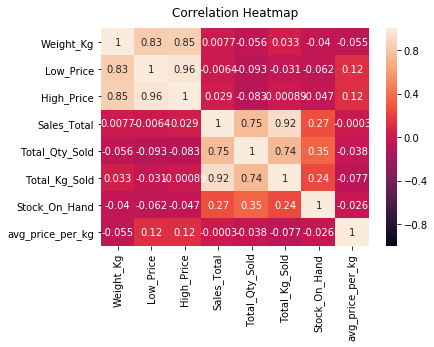

In [89]:
heatmap = sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

The heatmap above was generated using only the numberical columns before Dummy Variable Encoding is applied. This is because it will be difficult to analysis a heatmap with 179 columns. However, this heatmap will be suffice to show collinearity between predictor variables i.e. : 

- `Low_Price` and `High_Price` 
- `Weight_Kg` and `High_Price` 
- `Weight_Kg` and `Low_Price` 


In the following section, let's try building our model using Linear Regression.

## Create linear model

Let us import some modules.

In [90]:
# Regression models
from sklearn.linear_model import LinearRegression

# Model selection
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [91]:
X = dummy_df.drop('avg_price_per_kg',axis=1).values
y = dummy_df['avg_price_per_kg']

In [92]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

In [93]:
# define model
linear_model = LinearRegression(n_jobs=-1)

In [94]:
# Train the model
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [95]:
# Make predictions
train_pred = linear_model.predict(X_train)
test_pred = linear_model.predict(X_test)

In [96]:
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

In [97]:
df = {'Train RMSE': train_rmse,'Train R^2':train_r2,'Test RMSE': test_rmse,'Test R^2':test_r2}
df

{'Train RMSE': 1.0979816028994245,
 'Train R^2': 0.7221199222008812,
 'Test RMSE': 1.3526442154186065,
 'Test R^2': 0.5892777511645462}

**Metrics used**
  - Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. Root mean square error is commonly used in climatology, forecasting, and regression analysis to verify experimental results.
  - R-squared is a statistical measure of how close the data are to the fitted regression line. It is also  known as the coefficient of determination, or the coefficient of multiple determination for multiple regression; it is the percentage of the response variable variation that is explained by a linear model.

The test set's $r^{2}$ value is significantly lower than that of the train's. The RMSE of the test set is also larger compared to the RMSE of the train set. This indicates that our model is slightly underfitting our data.

In the next section, we will try to improve our linear model by introducing regularisation techniques.

# Regularisation

Regularisation is a method used to improve the predictive accuracy of a model while putting constraints on the predictor variables.

Recall that the least squares method seeks to minimise the sum of the squares of the residuals:

$$RSS = \sum_{i=1}^n(y_i-\hat{y}_i)^2$$   

which can be written in terms of the predictor variable coefficients, [$b_1, b_2, b_p$], and slope, $a$:   

$$RSS = \sum_{i=1}^n(y_i-(a+\sum_{j=1}^pb_jx_{ij}))^2$$

where _n_ is the number of observations, and _p_ is the number of predictor variables. In the case of **ridge regression**, the regression coefficients are calculated as the values that minimise:

$$\sum_{i=1}^n(y_i-(a+\sum_{j=1}^pb_jx_{ij}))^2 + \alpha\sum_{j=1}^pb_j^2$$

which is rewritten simply as:

$$\min_{\beta} (RSS + \alpha\sum_{j=1}^pb_j^2)$$

In minimising _RSS_ , we improve the overall fit of the model. In the newly introduced term, $\alpha\sum_{j=1}^pb_j^2$, the intention is to penalise those individual coefficients that get too large (those that contribute the most to reducing the fit).

In the new term, $\alpha$ is a tuning parameter which controls the degree to which the regression coefficients are penalised. The effect of this penalty parameter is to create a tradeoff between how much a coefficient contributes to minimising RSS and the size of the coefficient. In other words: _training fit_ vs. _size of coefficients_. 

In the newly introduced term, we can see that the penalty parameter is applied to the sum of the squares of the coefficients. This means that as we increase the size of the coefficients, the penalty will increase too. And so, this has the effect of _shrinking_ the coefficients towards zero.


Now let's apply ridge regression to our data.

## Ridge Regression

Before we apply ridge regression, we will need to scale our data.

Scaling data is a critical to regularisation as the penalty on particular coefficients in regularisation techniques depends largely on the scale associated with the variables. Regularisation puts constraints on the size of the coefficients related to each variable. Therefore, rescaling is very important for methods with regularisation because the size of the variables affects how much regularisation will be applied to that specific variable. So to make it fair, we need to get all the features on the same scale. 

### Data Scaling

In [98]:
# Preprocessing
from sklearn.preprocessing import StandardScaler

In [99]:
# Split data into predictors and response
X_ridge = dummy_df.drop('avg_price_per_kg', axis=1)
y_ridge = dummy_df['avg_price_per_kg']

In [100]:
# Create scaler object
scaler = StandardScaler()

In [101]:
# Create scaled version of the predictors (there is no need to scale the response)
X_scaled = scaler.fit_transform(X_ridge)

In [102]:
# Convert the scaled predictor values into a dataframe
X_standardise = pd.DataFrame(X_scaled,columns=X_ridge.columns)
X_standardise.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_EASTERN CAPE,Province_NATAL,Province_ORANGE FREE STATE,...,Date_2020-09-07,Date_2020-09-09,Date_2020-09-16,Date_2020-09-17,Date_2020-09-19,Date_2020-09-21,Date_2020-09-23,Date_2020-09-28,Date_2020-10-01,Date_2020-10-03
0,-0.120573,0.076621,0.016742,1.385065,0.755455,1.143643,0.626575,-0.321349,-0.140175,-0.052541,...,-0.083247,10.524696,-0.078947,-0.074407,-0.069577,-0.095015,-0.102133,-0.083247,-0.108805,-0.074407
1,-0.251064,-0.317181,-0.369182,-0.603068,-0.603553,-0.631306,1.779122,-0.321349,-0.140175,-0.052541,...,-0.083247,-0.095015,-0.078947,-0.074407,-0.069577,-0.095015,-0.102133,-0.083247,-0.108805,-0.074407
2,-0.120573,-0.213549,-0.151051,0.613252,0.997826,1.451233,-0.012044,-0.321349,-0.140175,-0.052541,...,-0.083247,-0.095015,-0.078947,-0.074407,-0.069577,-0.095015,-0.102133,-0.083247,-0.108805,-0.074407
3,5.235151,6.916329,5.486804,-0.571318,-0.677130,-0.559871,-0.755134,3.111884,-0.140175,-0.052541,...,-0.083247,-0.095015,-0.078947,-0.074407,-0.069577,-0.095015,-0.102133,12.012493,-0.108805,-0.074407
4,-0.251064,-0.317181,-0.369182,-0.452155,-0.300590,-0.442214,-0.453517,-0.321349,-0.140175,-0.052541,...,-0.083247,-0.095015,-0.078947,-0.074407,-0.069577,-0.095015,-0.102133,-0.083247,-0.108805,-0.074407


### Ridge Regression

Now that we've scaled our data, we can split it into a train and test set.

In [103]:
#Split the data into train and test, being sure to use the standardised predictors
X_train_ridge, X_test_ridge, y_train_ridge, y_test_ridge = train_test_split(X_standardise, 
                                                    y_ridge, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [104]:
# Import the ridge regression module from sklearn
from sklearn.linear_model import Ridge

In [105]:
# Create ridge model
ridge = Ridge()

In [106]:
# Train the model
ridge.fit(X_train_ridge, y_train_ridge)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

### Assess the predictive accuracy of the Ridge model 
We can make use of the `sklearn.metrics` library to assess the accuracy of our model. For comparison, we'll fit a linear model (without regularisation) to the data.

In [107]:
# Create linear model object
lm = LinearRegression(n_jobs=-1)

# Train linear model on scaled data
lm.fit(X_train_ridge, y_train_ridge)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [108]:
# Check training accuracy
train_lm = lm.predict(X_train_ridge)
train_ridge = ridge.predict(X_train_ridge)

print('Training RMSE')
print('Linear:', np.sqrt(mean_squared_error(y_train_ridge, train_lm)))
print('Ridge :', np.sqrt(mean_squared_error(y_train_ridge, train_ridge)))

Training RMSE
Linear: 1.0979938749515266
Ridge : 1.0984122190519405


In [109]:
test_lm = lm.predict(X_test_ridge)
test_ridge = ridge.predict(X_test_ridge)

print('Testing RMSE')
print('Linear:', np.sqrt(mean_squared_error(y_test_ridge, test_lm)))
print('Ridge :', np.sqrt(mean_squared_error(y_test_ridge, test_ridge)))

Testing RMSE
Linear: 1.352292029817506
Ridge : 1.3538910723753452


There is no significant improvement in the training MSE nor testing MSE when ridge regression is applied. 

Let us try **Lasso Regression** to improve our model.

## Lasso Regression

Recall the optimisation expression for ridge regression:

$$\min_{\beta} (RSS + \alpha\sum_{j=1}^pb_j^2)$$

where we attempt to minimise the RSS and some penalty term. This can be rewritten:

$$\min_{\beta} (RSS + \alpha(L2\_norm))$$

where $L2\_norm$ is the sum of the squares of the coefficients.

In LASSO regularisation, we replace the $L2\_norm$ with what is known as the $L1\_norm$: the sum of the _absolute_ values of the coefficients.

This is a relatively recent adaptation of ridge regression which is capable of shrinking predictors to exactly zero - effectively removing them from the model entirely and creating what we call a sparse model (one which uses some subset of all of the available predictors). In this way, LASSO achieves both shrinkage and subset selection.

A LASSO model is fit under the constraint of minimizing the following equation:

$$\sum_{i=1}^n(y_i-(a+\sum_{j=1}^pb_jx_{ij}))^2 + \alpha\sum_{j=1}^p|b_j|$$

which can be rewritten as follows:

$$\min_{\beta} (RSS + \alpha\sum_{j=1}^p|b_j|)$$

or,

$$\min_{\beta} (RSS + \alpha(L1\_norm))$$

### Data Scaling

Again, we will scale our data first.

In [110]:
# Split data into predictors and response
X_feat = dummy_df.drop('avg_price_per_kg', axis=1)
y_tar = dummy_df['avg_price_per_kg']

In [111]:
# Save standardized features into new variable
X_scaled2 = scaler.fit_transform(X_feat)

In [112]:
# Split dataset into train and test sets
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X_scaled2, 
                                                    y_tar, 
                                                    test_size=0.20,
                                                    random_state=42)

In [113]:
# Import LASSO module
from sklearn.linear_model import Lasso

In [114]:
# Create LASSO model object (define model), setting alpha to 0.01
lasso = Lasso(alpha=0.01)

In [115]:
# Train the LASSO model
lasso.fit(X_train_lasso, y_train_lasso)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [116]:
# Extract coefficient from model
coeff = pd.DataFrame(lasso.coef_, X_feat.columns, columns=['Coefficient'])

Lets visualize the predictors that were shrunk to zero.

In [117]:
no = coeff[coeff['Coefficient']==0]
no

,Coefficient
Weight_Kg,-0.0
Date_2019-12-30,0.0
Date_2020-01-02,0.0
Date_2020-01-06,0.0
Date_2020-01-10,-0.0
Date_2020-01-11,0.0
Date_2020-02-12,-0.0
Date_2020-02-15,0.0
Date_2020-03-17,0.0
Date_2020-03-20,-0.0


In [118]:
index_list = no.index.tolist()
index_list

['Weight_Kg',
 'Date_2019-12-30',
 'Date_2020-01-02',
 'Date_2020-01-06',
 'Date_2020-01-10',
 'Date_2020-01-11',
 'Date_2020-02-12',
 'Date_2020-02-15',
 'Date_2020-03-17',
 'Date_2020-03-20',
 'Date_2020-05-25',
 'Date_2020-05-27',
 'Date_2020-06-22',
 'Date_2020-06-27',
 'Date_2020-07-01',
 'Date_2020-07-13',
 'Date_2020-07-20',
 'Date_2020-07-30',
 'Date_2020-07-31',
 'Date_2020-08-13',
 'Date_2020-08-20',
 'Date_2020-08-25',
 'Date_2020-08-27',
 'Date_2020-09-01']

### Assessment of predictive accuracy

Again, we'll make use of the `sklearn.metrics` library to assess the accuracy of our model. We'll fit the following models as well, in order to compare the LASSO results thoroughly:

- A least squares model using all available predictors;
- A least squares model using the predictors with non-zero coefficients from LASSO;
- A ridge regression model using all available predictors.

First, we'll create a subset of our data set, removing all predictor variables with a coefficient of zero.

In [119]:
X_subset = X_feat.drop(['Weight_Kg',
 'Date_2019-12-30',
 'Date_2020-01-02',
 'Date_2020-01-06',
 'Date_2020-01-10',
 'Date_2020-01-11',
 'Date_2020-02-12',
 'Date_2020-02-15',
 'Date_2020-03-17',
 'Date_2020-03-20',
 'Date_2020-05-25',
 'Date_2020-05-27',
 'Date_2020-06-22',
 'Date_2020-06-27',
 'Date_2020-07-01',
 'Date_2020-07-13',
 'Date_2020-07-20',
 'Date_2020-07-30',
 'Date_2020-07-31',
 'Date_2020-08-13',
 'Date_2020-08-20',
 'Date_2020-08-25',
 'Date_2020-08-27',
 'Date_2020-09-01'],axis=1)
X_subset.shape

(1453, 152)

In [120]:
# scale subset data
X_subset_scaled = scaler.fit_transform(X_subset)

# create train and test set of the subset data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_subset_scaled, 
                                                        y_tar, 
                                                        test_size=0.20, 
                                                        random_state=1,
                                                        shuffle=False)

# Least squares using non-zero variables from LASSO
lm_subset = LinearRegression()

# Least squares using all predictors
lm_all = LinearRegression()

# Ridge using all predictors
ridge = Ridge()

In [121]:
# Train the models
lm_subset.fit(X_train2, y_train2)
lm_all.fit(X_train_lasso, y_train_lasso)
ridge.fit(X_train_lasso, y_train_lasso)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [122]:
# Make training set predictions for each model
train_lm_subset = lm_subset.predict(X_train2)
train_lm_all = lm_all.predict(X_train_lasso)
train_ridge = ridge.predict(X_train_lasso)
train_lasso = lasso.predict(X_train_lasso)

In [123]:
# Make test set predictions for each model
test_lm_subset = lm_subset.predict(X_test2)
test_lm_all = lm_all.predict(X_test_lasso)
test_ridge = ridge.predict(X_test_lasso)
test_lasso = lasso.predict(X_test_lasso)

In [124]:
# Dictionary of results
results_dict = {'Training RMSE':
                    {
                        "Least Squares, Subset": np.sqrt(mean_squared_error(y_train2, train_lm_subset)),
                        "Least Squares, All": np.sqrt(mean_squared_error(y_train_lasso, train_lm_all)),
                        "Ridge": np.sqrt(mean_squared_error(y_train_lasso, train_ridge)),
                        "LASSO": np.sqrt(mean_squared_error(y_train_lasso, train_lasso))
                    },
                    'Test RMSE':
                    {
                        "Least Squares, Subset": np.sqrt(mean_squared_error(y_test2, test_lm_subset)),
                        "Least Squares, All": np.sqrt(mean_squared_error(y_test_lasso, test_lm_all)),
                        "Ridge": np.sqrt(mean_squared_error(y_test_lasso, test_ridge)),
                        "LASSO": np.sqrt(mean_squared_error(y_test_lasso, test_lasso))
                    }
                }

In [125]:
# Create dataframe from dictionary
results_df = pd.DataFrame(data=results_dict)
results_df

,Training RMSE,Test RMSE
LASSO,1.132566,1.356620
"Least Squares, All",1.097984,1.352162
"Least Squares, Subset",1.112167,1.418930
Ridge,1.098412,1.353891


Training the linear model on the subset of data (predictor variables dropped with coefficient = 0) is not a good idea since the test RMSE is highest compared to all the other models.

From the above table we can see that the training RMSE actually increased using Lasso regression, whilst the test RMSE decreased. This shows that our Lasso model is actually overfitting less on our training set.

However, the test RMSE is still not what we desire. We will investigate more complex models in our quest to improve the predictive power of our model.

# Decision Trees

Decision Trees are tree-like (upside down) machine learning models which represent data by partitioning it into different sections based on questions asked of predictive variables in the data. 

In [154]:
# set test size to 20 % of training data
x_train, x_test, y_train, y_test = train_test_split(X_scaled2, y_tar, test_size=0.2, random_state=42)

### Building the Decision Tree

In [127]:
# import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

#### Decision Tree model tuning

Tuning the hyperparamaters of the Decision Tree model is important to obtain optimal performance. Let's create a dictionary that houses a lists of values where we will choose from to tune the hyperparamaters. We will be tuning `max_depth`, `min_samples_leaf` and `min_samples_split`.

In [141]:
param_dist = {'max_depth':list(range(3,24,3)),'min_samples_leaf':list(range(5,100,10)), 'min_samples_split': list(range(10,50,10))}

In order to find the best combination of hyperparamaters, we will import `GridSearchCV`.

In [132]:
from sklearn.model_selection import GridSearchCV

In [142]:
regr_tree = DecisionTreeRegressor()
grid = GridSearchCV(regr_tree,param_grid=param_dist, cv=10, n_jobs=-1)

In [143]:
# fit the grid to the train set in order to find best combination of hyperparamters
grid.fit(x_train,y_train)

C:\Users\Hendri\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [3, 6, 9, 12, 15, 18, 21],
                         'min_samples_leaf': [5, 15, 25, 35, 45, 55, 65, 75, 85,
                                              95],
                

In [144]:
# show hyperparamters of DecisionTreeRegressor
grid.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=20, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [145]:
# show best r^2 value from combinations available
grid.best_score_

0.8422271064619952

In [146]:
# show best combination of values for hyperparamaters that were investigated
grid.best_params_

{'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 20}

Now, lets apply these optimal hyperparamaters to our **DecisionTreeRegressor**.

In [155]:
# Instantiate regression tree model
regr_tree = DecisionTreeRegressor(max_depth=15,min_samples_leaf=5,min_samples_split=20,random_state=42)

In [156]:
# fit and train model
regr_tree.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=20, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [157]:
# get predictions for test data
y_pred = regr_tree.predict(x_test)

# calculate MSE
MSE = mean_squared_error(y_pred,y_test)

# Report RMSE
print("Regression Decision Tree model RMSE is:",np.sqrt(MSE))

Regression Decision Tree model RMSE is: 0.7105806579948765


The RMSE for the test set improved significantly from 1.40 (Lasso) to 0.69 (Decision Tree), however we would like to improve the RMSE even further. Thus, let's enter the Random Forest... 

# Random Forests

A random forest is a powerful non-parametric algorithm and as mentioned is an example of an **ensemble** method built on decision trees, meaning that it relies on aggregating the results of an ensemble of decision trees. The ensembled trees are randomized and the output is mean prediction of the individual trees.

In [158]:
# set test size to 20 % of training data
x_train_random, x_test_random, y_train_random, y_test_random = train_test_split(X_scaled2, y_tar, test_size=0.2, random_state=42)

In [159]:
# import RandomForesRegressor
from sklearn.ensemble import RandomForestRegressor

#### Model Tuning for Random Forest

In [163]:
# dictionary containing list of values for getting optimal hyperparamaters
param_dist_rf = {'n_estimators': list(range(20,140,20)),'max_depth': list(range(10,30,5)),'min_samples_split':list(range(5,50,10))}

In [164]:
# define grid
grid_rf = GridSearchCV(RF,param_grid=param_dist_rf, cv=10, n_jobs=-1)

In [165]:
# fit and train grid
grid_rf.fit(x_train_random,y_train_random)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=15, max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=5,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=120, n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20, 25],
                         'min_samples_split': [5, 15, 

In [166]:
# return best r^2 value for optimal combination of hyperparamaters
grid_rf.best_score_

0.8931248265653742

In [167]:
# get best combination of hyperparamaters that was tuned
grid_rf.best_params_

{'max_depth': 25, 'min_samples_split': 5, 'n_estimators': 60}

Now, lets apply these optimal hyperparamaters to our **RandomForestRegressor**.

In [168]:
# Instantiate Random Forest model with optimal hyperparamters
RF = RandomForestRegressor(n_estimators=120, max_depth=15, min_samples_split=5,random_state=1)

In [169]:
# fit and train model
RF.fit(x_train_random,y_train_random)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=120,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [170]:
# Get predictions
y_predictions = RF.predict(x_test_random)

# Compute RMSE
print("RMSE:",np.sqrt(mean_squared_error(y_test_random,y_predictions)))

RMSE: 0.612020534211102


# Feature Importance

In [110]:
feat_imp = RF.feature_importances_
df = pd.DataFrame(feat_imp, index=[X_feat.columns], columns=['Feature Importance'])
df.sort_values('Feature Importance',ascending=False)

,Feature Importance
Low_Price,0.445786
High_Price,0.251410
Weight_Kg,0.161601
Container_IA400,0.082890
Sales_Total,0.028154
Stock_On_Hand,0.007518
Container_M4183,0.005685
Total_Kg_Sold,0.005154
Total_Qty_Sold,0.004026
Container_EC120,0.002667


# Predicting on the test data

### Preprocessing

In [37]:
test = pd.read_csv(r'https://raw.githubusercontent.com/CPNMorgan/sharing-github/main/df-test_set.csv')

In [38]:
test.head()

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2
2,3,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45
3,4,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8
4,5,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


In [39]:
test_index = test['Index']
test = test.drop(['Commodities','Index'], axis=1)

In [40]:
test.head()

,Province,Container,Size_Grade,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,2020-01-20,220.0,220.0,1760.0,8,146.4,2
2,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,2020-08-19,120.0,120.0,720.0,6,72.0,45
3,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,2020-05-06,160.0,160.0,160.0,1,18.3,8
4,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


In [41]:
test.shape

(685, 11)

In [75]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 11 columns):
Province          685 non-null object
Container         685 non-null object
Size_Grade        685 non-null object
Weight_Kg         685 non-null float64
Date              685 non-null object
Low_Price         685 non-null float64
High_Price        685 non-null float64
Sales_Total       685 non-null float64
Total_Qty_Sold    685 non-null int64
Total_Kg_Sold     685 non-null float64
Stock_On_Hand     685 non-null int64
dtypes: float64(5), int64(2), object(4)
memory usage: 58.9+ KB


In [42]:
new_train = train_data.drop('avg_price_per_kg',axis=1)
new_train.head()

,Province,Container,Size_Grade,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
1,CAPE,M4183,1L,18.3,2020-09-09,150.0,170.0,51710.0,332,6075.6,822
7,CAPE,JG110,2M,11.0,2020-04-14,50.0,50.0,16000.0,320,3520.0,0
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,2020-04-16,55.0,55.0,990.0,18,162.0,1506
40,CAPE,M4183,1S,18.3,2020-05-04,80.0,120.0,32020.0,388,7100.4,443
69,EASTERN CAPE,IA400,1S,400.0,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2


In [84]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 11 columns):
Province          1952 non-null object
Container         1952 non-null object
Size_Grade        1952 non-null object
Weight_Kg         1952 non-null float64
Date              1952 non-null object
Low_Price         1952 non-null float64
High_Price        1952 non-null float64
Sales_Total       1952 non-null float64
Total_Qty_Sold    1952 non-null int64
Total_Kg_Sold     1952 non-null float64
Stock_On_Hand     1952 non-null int64
dtypes: float64(5), int64(2), object(4)
memory usage: 183.0+ KB


In [43]:
vertical_stack = pd.concat([new_train,test],axis=0)
vertical_stack.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2637 entries, 1 to 684
Data columns (total 11 columns):
Province          2637 non-null object
Container         2637 non-null object
Size_Grade        2637 non-null object
Weight_Kg         2637 non-null float64
Date              2637 non-null object
Low_Price         2637 non-null float64
High_Price        2637 non-null float64
Sales_Total       2637 non-null float64
Total_Qty_Sold    2637 non-null int64
Total_Kg_Sold     2637 non-null float64
Stock_On_Hand     2637 non-null int64
dtypes: float64(5), int64(2), object(4)
memory usage: 247.2+ KB


In [44]:
vertical_stack.head()

,Province,Container,Size_Grade,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
1,CAPE,M4183,1L,18.3,2020-09-09,150.0,170.0,51710.0,332,6075.6,822
7,CAPE,JG110,2M,11.0,2020-04-14,50.0,50.0,16000.0,320,3520.0,0
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,2020-04-16,55.0,55.0,990.0,18,162.0,1506
40,CAPE,M4183,1S,18.3,2020-05-04,80.0,120.0,32020.0,388,7100.4,443
69,EASTERN CAPE,IA400,1S,400.0,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2


In [45]:
X_real = pd.get_dummies(vertical_stack,drop_first=True)
X_real.shape

(2637, 178)

In [46]:
df_test = X_real.iloc[1952:,:]
df_test.shape

(685, 178)

In [47]:
df_test.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_EASTERN CAPE,Province_NATAL,Province_ORANGE FREE STATE,...,Date_2020-09-07,Date_2020-09-09,Date_2020-09-16,Date_2020-09-17,Date_2020-09-19,Date_2020-09-21,Date_2020-09-23,Date_2020-09-28,Date_2020-10-01,Date_2020-10-03
0,12.0,128.0,136.0,5008.0,38,456.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,18.3,220.0,220.0,1760.0,8,146.4,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12.0,120.0,120.0,720.0,6,72.0,45,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,18.3,160.0,160.0,160.0,1,18.3,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18.3,140.0,160.0,14140.0,100,1830.0,19,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
test_scaled = scaler.fit_transform(df_test)

### Making predictions

In [50]:
predictions = model.predict(df_test)
predictions

array([ 9.18188366, 10.27494758,  8.57659107,  7.70483434,  7.25520315,
        4.73481625,  4.75084397,  7.75576638,  8.67191653,  7.6346783 ,
        5.12021273,  6.24736614,  8.73253505,  4.87500357,  2.95650265,
        6.86708491,  8.00818715,  4.97764762, 10.70233681,  6.80091732,
        5.57980254,  4.87359873,  7.36306879,  6.7817892 ,  4.02398791,
        6.71001866,  6.85146333,  8.07958237,  7.86026045,  7.95531529,
        7.95025626,  4.46977606,  9.30012759,  8.21603783,  3.9141331 ,
        8.5906737 ,  9.39817007, 10.0576688 ,  6.60765402,  7.30634912,
        9.58675795,  8.0274516 ,  9.14228551,  5.25170255,  6.57387417,
        5.12105482,  4.5218955 ,  6.55902698,  6.22161871,  4.188634  ,
        0.81827874,  5.31583893,  8.08320176, 10.5998903 ,  8.48057032,
        6.2075658 ,  8.41673573,  9.24145861,  9.22038069,  8.45490494,
        8.83662599,  9.75735454,  4.77552815,  8.40884832,  8.78434053,
        6.14431373,  4.44437181,  4.31138071,  7.01033888,  7.01

In [91]:
predict2 = lasso.predict(test_scaled)
predict2

array([ 9.10120741,  9.75501286,  8.32511965,  8.4044834 ,  7.79846321,
        3.97443983,  4.95658089,  7.81805048,  8.21452398,  7.47487093,
        4.88717618,  5.67819135,  9.12898803,  5.37421059,  2.04803718,
        6.71996762,  7.85532089,  4.03623536, 10.1275658 ,  6.13006273,
        5.42238169,  4.31523768,  7.0728233 ,  6.93262758,  4.81383525,
        6.41112188,  7.24508268,  8.30857072,  7.72777641,  7.77151864,
        7.6004233 ,  4.93616582,  8.79064466,  8.29878216,  3.21607243,
        7.96351612,  8.58734748, 11.74456138,  6.50903177,  7.13138279,
        9.11046874,  8.34350676,  9.18894735,  5.2347237 ,  6.28214607,
        4.61495614,  3.62211272,  6.4199652 ,  6.20102619,  2.95049371,
       -0.37776704,  5.76236624,  8.13702176, 11.13496763,  7.86377242,
        6.40244739,  8.19724527,  8.81668121,  9.07374091,  8.50073596,
        8.62259412, 10.36342476,  5.30938018,  8.04783693,  8.5827251 ,
        6.06369398,  4.72324959,  4.2761111 ,  6.08282271,  6.66

## Submission



In [100]:
submission = pd.DataFrame(
    {'Index': test_index,
     'ave_price_per_kg': predictions
    })

In [101]:
submission.head()

,Index,Price
0,1,9.181884
1,2,10.274948
2,3,8.576591
3,4,7.704834
4,5,7.255203


In [164]:
# save DataFrame to csv file for submission
submission.to_csv("Team_TS5_Regression.csv", index=False)

In [96]:
submission2 = pd.DataFrame(
    {'Index': test_index,
     'avg_price_per_kg': predict2
    })

In [97]:
submission2.tail()

,Index,avg_price_per_kg
680,681,5.731757
681,682,8.085623
682,683,5.135878
683,684,8.044346
684,685,7.800376


In [98]:
# save DataFrame to csv file for submission
submission2.to_csv("Team_TS5_Regression.csv", index=False)

In [55]:
import pickle

model_save_path = "linear_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(linear_model,file)

## Conclusion